In [61]:
##### Pense bête #####
"""
Meilleur apprentissage : https://scikit-learn.org/stable/modules/tree.html
Meilleur visualisation : https://mljar.com/blog/visualize-decision-tree/

Faire varier les paramètres
Tester sur deuxième jeu de données
Rendre notebok plus joli pour la présentation

"""

'\nMeilleur apprentissage : https://scikit-learn.org/stable/modules/tree.html\nMeilleur visualisation : https://mljar.com/blog/visualize-decision-tree/\n\n'

In [62]:
##### Jeu de données #####

# Import des données
import pandas as pd
pam50 = pd.read_csv("Data_Pam50.csv")

# Extraction des features (niveau d'expression de divers gènes) et des labels (type de cancer)
features = pam50[pam50.columns[2:]]
labels = pam50["subtype"]
print("features :", list(features.columns))


# Séparation du jeux d'apprentissage et du jeu de test
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.33)

# Petit jeu de données => Il faut vérifier que toutes les classes sont présentes dans le jeu de test
print("train_labels :", train_labels.unique())
print("test_labels :", test_labels.unique())


features : ['ACTR3B', 'ANLN', 'BAG1', 'BCL2', 'BIRC5', 'BLVRA', 'CCNB1', 'CCNE1', 'CDC20', 'CDC6', 'CDCA1', 'CDH3', 'CENPF', 'CEP55', 'CXXC5', 'EGFR', 'ERBB2', 'ESR1', 'EXO1', 'FGFR4', 'FOXA1', 'FOXC1', 'GPR160', 'GRB7', 'KIF2C', 'KNTC2', 'KRT14', 'KRT17', 'KRT5', 'MAPT', 'MDM2', 'MELK', 'MIA', 'MKI67', 'MLPH', 'MMP11', 'MYBL2', 'MYC', 'NAT1', 'ORC6L', 'PGR', 'PHGDH', 'PTTG1', 'RRM2', 'SFRP1', 'SLC39A6', 'TMEM45B', 'TYMS', 'UBE2C', 'UBE2T']
train_labels : ['Her2' 'LumA' 'LumB' 'Basal' 'Normal']
test_labels : ['Her2' 'LumB' 'LumA' 'Basal' 'Normal']


In [63]:
##### Entrainement #####
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
print (classifier.get_params())
classifier = classifier.fit(train_features, train_labels)



{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


              precision    recall  f1-score   support

       Basal       1.00      1.00      1.00         6
        Her2       0.82      1.00      0.90         9
        LumA       1.00      0.50      0.67         4
        LumB       1.00      0.67      0.80         3
      Normal       0.67      1.00      0.80         2

    accuracy                           0.88        24
   macro avg       0.90      0.83      0.83        24
weighted avg       0.90      0.88      0.87        24



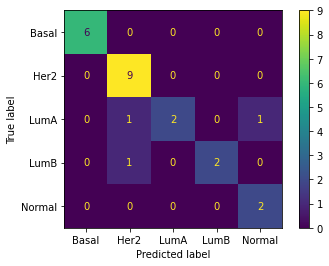

In [64]:
##### Test #####
predictions = classifier.predict(test_features)
predict_probas = classifier.predict_proba(test_features)

from sklearn import metrics 
print(metrics.classification_report(test_labels, predictions, zero_division = 0))
metrics.plot_confusion_matrix(classifier, test_features, test_labels)



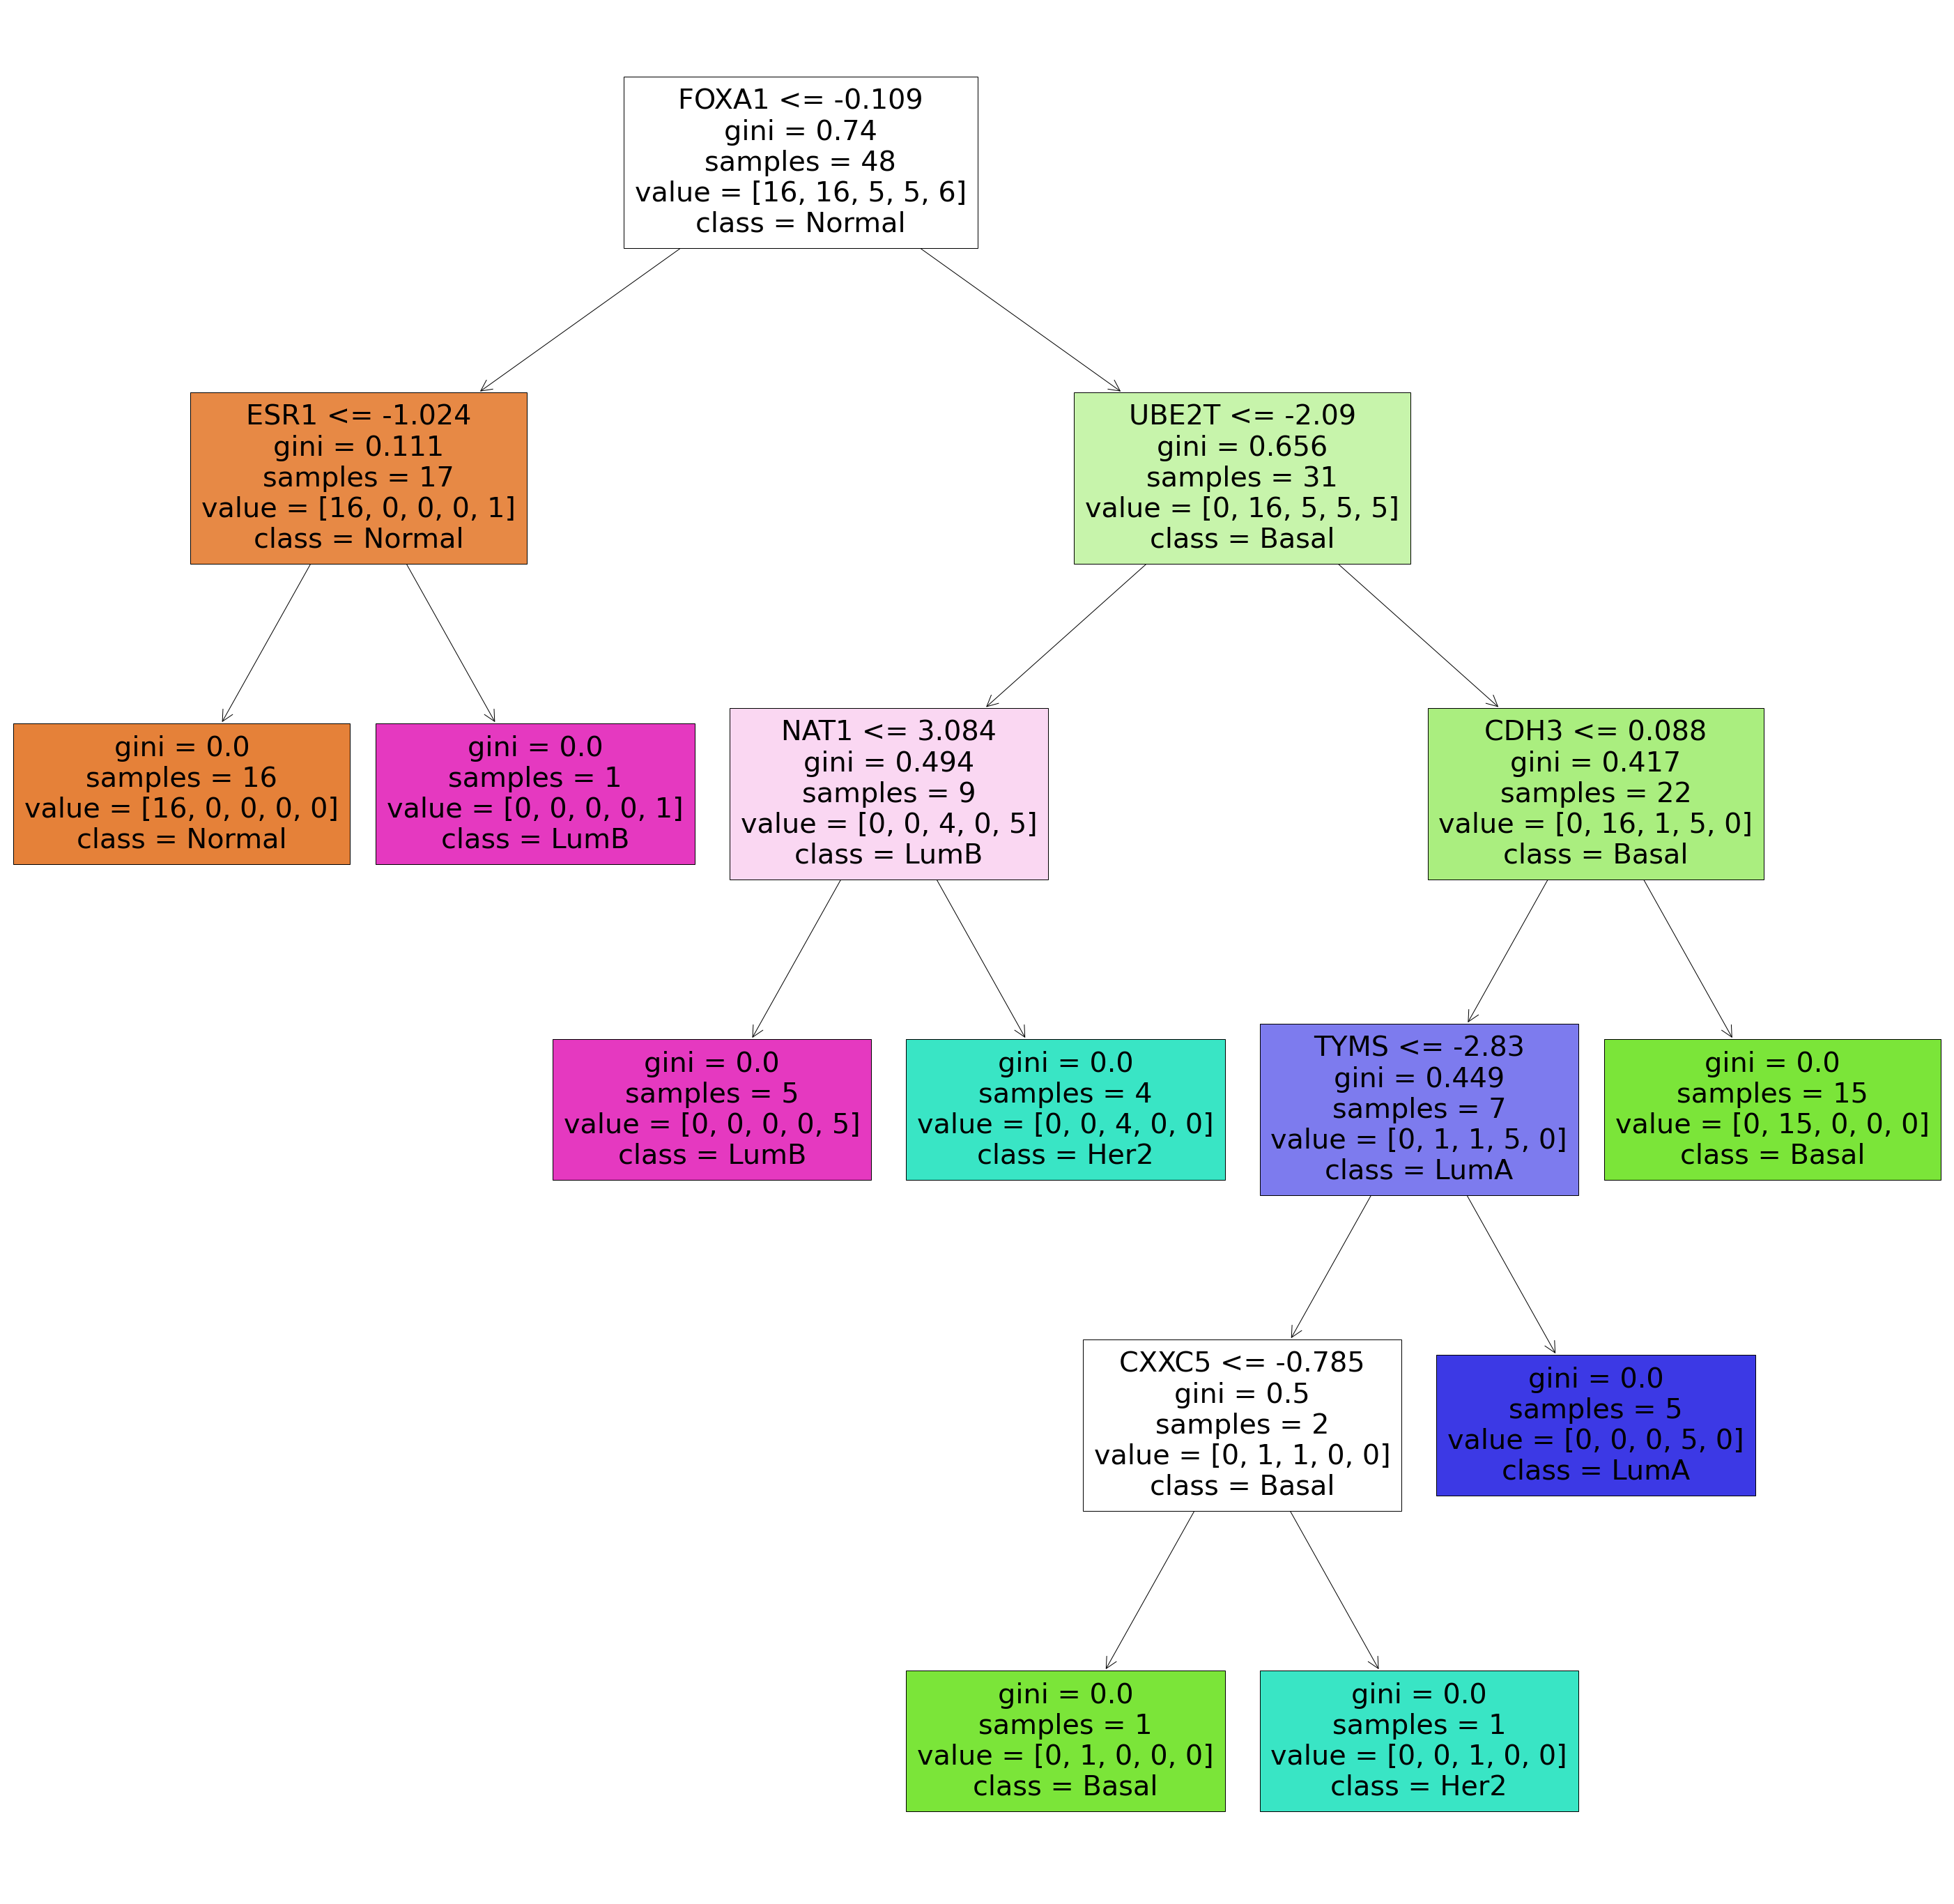

In [65]:
# Visualisation arbre
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(50,50)
tree.plot_tree(classifier, 
    feature_names=list(features.columns),
    class_names=labels.unique(),
    filled=True)
fig.savefig("decistion_tree.png")